In [1]:
#predict employee churn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('employee_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [4]:
df.duplicated().sum()

9

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    1
department               1
salary                   1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 0 to 11581
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11573 non-null  float64
 1   last_evaluation        11573 non-null  float64
 2   number_project         11573 non-null  int64  
 3   average_montly_hours   11573 non-null  int64  
 4   time_spend_company     11573 non-null  int64  
 5   Work_accident          11573 non-null  int64  
 6   quit                   11573 non-null  int64  
 7   promotion_last_5years  11572 non-null  float64
 8   department             11572 non-null  object 
 9   salary                 11572 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 994.6+ KB


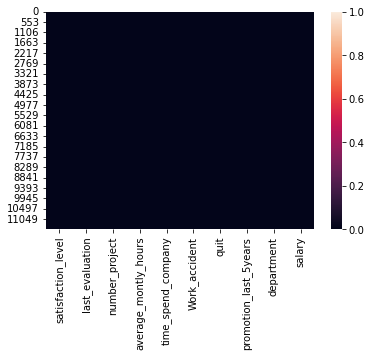

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
df['salary'].value_counts()

low       5575
medium    5096
high       901
Name: salary, dtype: int64

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000,11572.000000
mean,0.628509,0.716736,3.803940,200.560010,3.305366,0.152769,0.172038,0.013826
std,0.241956,0.168802,1.169159,48.826495,1.209795,0.359781,0.377430,0.116775
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
#fill null rows of salary column with mean of normalized-losses 
#columns permanently

df["salary"].fillna('low',inplace=True)

In [12]:
df['promotion_last_5years'].unique()

array([ 0.,  1., nan])

In [13]:
df['promotion_last_5years'].value_counts()

0.0    11412
1.0      160
Name: promotion_last_5years, dtype: int64

In [14]:
#fill null rows of promotion_last_5years column with mean of normalized-losses 
#columns permanently

df["promotion_last_5years"].fillna('0.0',inplace=True)

In [15]:
df["promotion_last_5years"].replace("0.0",0.0,inplace=True)

In [16]:
df['promotion_last_5years'].value_counts()

0.0    11413
1.0      160
Name: promotion_last_5years, dtype: int64

In [17]:
df['department'].value_counts()

sales          3086
technical      2227
support        1790
IT              934
RandD           688
product_mng     638
marketing       633
accounting      610
hr              601
management      365
Name: department, dtype: int64

In [18]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', nan], dtype=object)

In [19]:
#fill null rows of department column with mean of normalized-losses 
#columns permanently

df["department"].fillna('sales',inplace=True)

In [20]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [21]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

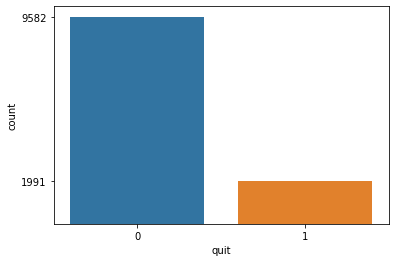

In [22]:
# Visualize
sns.countplot(data=df,x='quit')
f=df['quit'].value_counts()
plt.yticks(f)
plt.show()

In [23]:
#apply labelEncoder on salary and department columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['salary']=le.fit_transform(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,1
1,0.80,0.86,5,262,6,0,1,0.0,sales,2
2,0.11,0.88,7,272,4,0,1,0.0,sales,2
3,0.72,0.87,5,223,5,0,1,0.0,sales,1
4,0.37,0.52,2,159,3,0,1,0.0,sales,1


In [25]:
df['department']=le.fit_transform(df['department'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,7,1
1,0.80,0.86,5,262,6,0,1,0.0,7,2
2,0.11,0.88,7,272,4,0,1,0.0,7,2
3,0.72,0.87,5,223,5,0,1,0.0,7,1
4,0.37,0.52,2,159,3,0,1,0.0,7,1


In [26]:
#Here clear understand : data is imbalance : -
#We have to balance dataset 
#Sampling Technique : -
#classification algorithm 
#Data Imbalance : - we handle imbalance data , we take some sampling technique.
#There are 2 types of sampling technique :-
#1. Random Over sampling tech. 
#2. Random under sampling tech.
'''
If you have basically reducing the majority class that is known as under 
sampling
if you are increasing the minority class that is known as over sampling .

'''

'\nIf you have basically reducing the majority class that is known as under \nsampling\nif you are increasing the minority class that is known as over sampling .\n\n'

In [27]:
#First we will use RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [28]:
#select input and output
X=df.drop('quit', axis=1)
#or X=df.iloc[:,:-1]
Y=df['quit']
#or Y=df.iloc[:,-1]

In [29]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=1)

In [30]:
# Applying standard scaler on X_train and X_test
from sklearn.preprocessing import StandardScaler
# Create object of standard scaler class
ss= StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [31]:
#to convert minority class (1) into majority class (0)
ros= RandomOverSampler(random_state=1)

In [32]:
#apply over sampler on training data
X_train_ros, Y_train_ros=ros.fit_resample(X_train, Y_train)

In [33]:
Y_train_ros.value_counts()

1    6738
0    6738
Name: quit, dtype: int64

In [34]:
#apply over sampler on testing data
X_test_ros, Y_test_ros=ros.fit_resample(X_test, Y_test)

In [35]:
Y_test_ros.value_counts()

0    2844
1    2844
Name: quit, dtype: int64

In [36]:
#we will first use logistic regression
from sklearn.linear_model import LogisticRegression

In [37]:
lr=LogisticRegression()

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
#create a function
def create_model(model):          #model user defined which holds the object of algo
    #train the model
    model.fit(X_train,Y_train)
    #test the model
    Y_pred=model.predict(X_test)
    #Generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [40]:
#Logistic Regression model
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2844
           1       0.47      0.19      0.27       628

    accuracy                           0.82      3472
   macro avg       0.66      0.57      0.58      3472
weighted avg       0.78      0.82      0.78      3472

[[2711  133]
 [ 509  119]]


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt=DecisionTreeClassifier(random_state=1)

In [43]:
#call function create_model() and pass the parameter: object of DT
#DT model without pruning
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2844
           1       0.89      0.92      0.91       628

    accuracy                           0.97      3472
   macro avg       0.94      0.95      0.94      3472
weighted avg       0.97      0.97      0.97      3472

[[2775   69]
 [  50  578]]


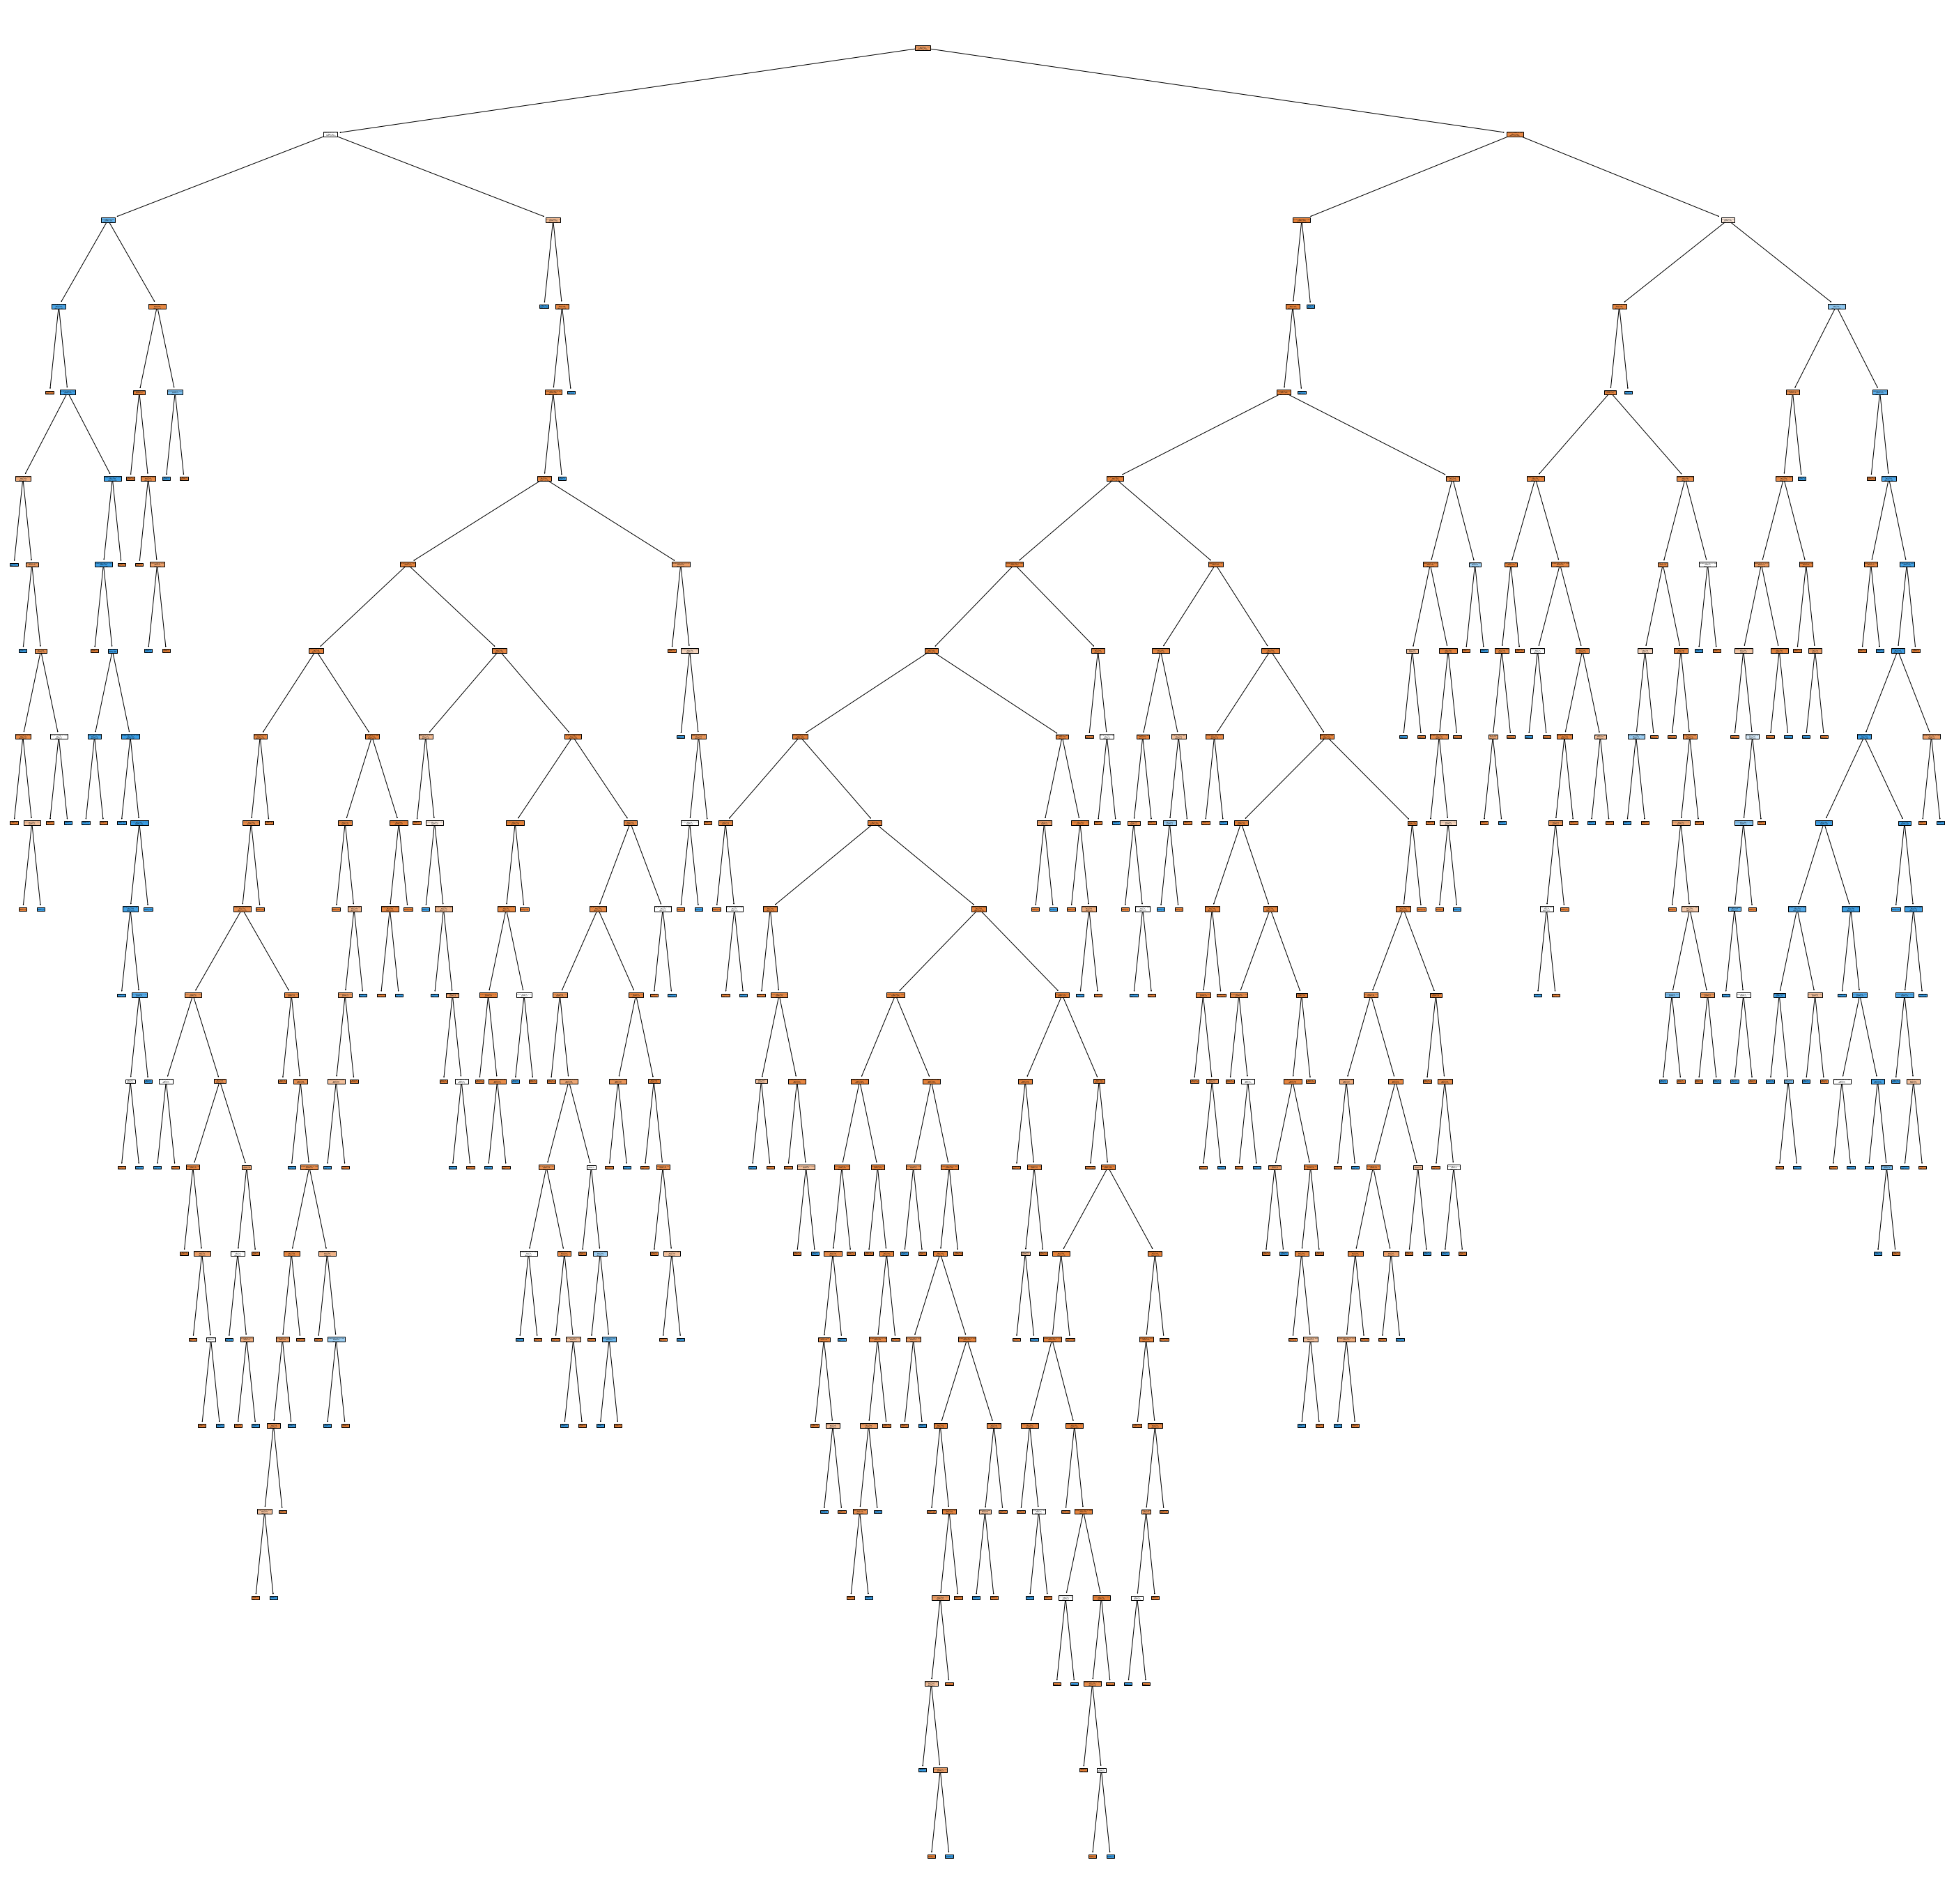

In [44]:
#create a tree
from sklearn import tree
features = X.columns
plt.figure(figsize=(50,50))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [45]:
##create object of DecisionTreeClassifier class and passing the parameter(Pruning)
#max_depth

dt1=DecisionTreeClassifier(random_state=1, max_depth=8) #by Default gini index

In [46]:
#DT model with pruning max_depth
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2844
           1       0.96      0.92      0.94       628

    accuracy                           0.98      3472
   macro avg       0.97      0.96      0.96      3472
weighted avg       0.98      0.98      0.98      3472

[[2823   21]
 [  50  578]]


In [47]:
#We can see that the recall score has increased from 0.98 to 0.99 for class 0 but same for class 1
#we will try to increase class 1 score 

In [48]:
d={'Input': X.columns, 'IG': dt1.feature_importances_}
F=pd.DataFrame(d)
F.sort_values('IG', ascending=False, ignore_index=True)

,Input,IG
0,satisfaction_level,0.513807
1,last_evaluation,0.150328
2,number_project,0.143499
3,time_spend_company,0.124218
4,average_montly_hours,0.066160
5,department,0.001363
6,salary,0.000625
7,Work_accident,0.000000
8,promotion_last_5years,0.000000


In [49]:
#check with different values of max_depth unntil we can find the best score and solve overfitting
dt2=DecisionTreeClassifier(random_state=1, max_depth=7) #by Default gini index

In [50]:
#DT model with pruning max_depth
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2844
           1       0.97      0.92      0.95       628

    accuracy                           0.98      3472
   macro avg       0.98      0.96      0.97      3472
weighted avg       0.98      0.98      0.98      3472

[[2829   15]
 [  50  578]]


In [51]:
#create object of DTC class
#parameter min_samples_leaf by default gini index method
'''
for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Min Sample Leaf: ", i)
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1, min_samples_leaf=30)


In [52]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2844
           1       0.95      0.91      0.93       628

    accuracy                           0.98      3472
   macro avg       0.97      0.95      0.96      3472
weighted avg       0.98      0.98      0.98      3472

[[2816   28]
 [  55  573]]


In [53]:
#Till now we were using Gini index by default
#We will try the same method with Entropy now
#Entropy method= -P(yes)*log(P(yes))-Q(no)*log(Q(no))

In [54]:
#first create DTC class and pass the parameter 'entropy'

dt=DecisionTreeClassifier(random_state=1, criterion='entropy')
#not applying pruning right now as we are checking again if the model is overfit

In [55]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2844
           1       0.91      0.92      0.92       628

    accuracy                           0.97      3472
   macro avg       0.95      0.95      0.95      3472
weighted avg       0.97      0.97      0.97      3472

[[2790   54]
 [  51  577]]


In [56]:
##create object of DecisionTreeClassifier class and passing the parameter(Pruning)
#max_depth
'''
for i in range(1,9):
    dt=DecisionTreeClassifier(random_state=1,criterion='entropy', max_depth=i)
    print('Max Depth: ', i)
    
    dt=create_model(dt)
'''
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy', max_depth=8)

In [57]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2844
           1       0.97      0.92      0.95       628

    accuracy                           0.98      3472
   macro avg       0.98      0.96      0.97      3472
weighted avg       0.98      0.98      0.98      3472

[[2829   15]
 [  50  578]]


In [58]:
'''
for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,criterion='entropy', min_samples_leaf=i)
    print("Min Sample Leaf: ", i)
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,criterion='entropy', min_samples_leaf=45)

In [59]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2844
           1       0.94      0.89      0.92       628

    accuracy                           0.97      3472
   macro avg       0.96      0.94      0.95      3472
weighted avg       0.97      0.97      0.97      3472

[[2809   35]
 [  66  562]]


In [60]:
#apply ensembling technique: randomforesttree (bootstrapping method) with bagging
#call Random Forest Tree from package

from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc=RandomForestClassifier(n_estimators=10, max_features=11, random_state=1)
#here n_estimators means the no. of DTC, min: 10 and max:100
#by default gini index
'''
for i in range(16,1,-1):
    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1)
    print('No. of features: ', i)
    #call function
    rfc=create_model(rfc)
'''

"\nfor i in range(16,1,-1):\n    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1)\n    print('No. of features: ', i)\n    #call function\n    rfc=create_model(rfc)\n"

In [62]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2844
           1       0.98      0.92      0.95       628

    accuracy                           0.98      3472
   macro avg       0.98      0.96      0.97      3472
weighted avg       0.98      0.98      0.98      3472

[[2830   14]
 [  50  578]]


In [63]:
#Now we will see results with entropy DTC

rfc1=RandomForestClassifier(n_estimators=10, max_features=7, random_state=1, criterion='entropy')
'''
for i in range(16,1,-1):
    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1, criterion='entropy')
    print('No. of features: ', i)
    #call function
    rfc=create_model(rfc)
'''
#we checked with above loop and found best score is with 7 features

"\nfor i in range(16,1,-1):\n    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1, criterion='entropy')\n    print('No. of features: ', i)\n    #call function\n    rfc=create_model(rfc)\n"

In [64]:
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2844
           1       0.98      0.92      0.95       628

    accuracy                           0.98      3472
   macro avg       0.98      0.96      0.97      3472
weighted avg       0.98      0.98      0.98      3472

[[2834   10]
 [  51  577]]


In [65]:
# Show all the information gain of all the features
d={'Input':X.columns,'IG':rfc.feature_importances_}
#convert to data frame 
f=pd.DataFrame(d)
f.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,satisfaction_level,0.476707
1,number_project,0.146954
2,last_evaluation,0.139055
3,time_spend_company,0.123386
4,average_montly_hours,0.097596
5,department,0.011544
6,salary,0.003394
7,Work_accident,0.001363
8,promotion_last_5years,0.000000


In [66]:
#Use Boosting technique: It is an ensembling Technique

#1. ADA boosting: means Adaptor Boosting: It works on decision stump

from sklearn.ensemble import AdaBoostClassifier

In [67]:
ada=AdaBoostClassifier(n_estimators=100, random_state=1)
#n_estimators means no. of decision stumps can be <=100 
#we can see that we have 16 inputs
'''
for i in range(1,17):
    ada=AdaBoostClassifier(n_estimators=i, random_state=1)
    print('No. of decision stumps: ', i)
    ada=create_model(ada)
'''

"\nfor i in range(1,17):\n    ada=AdaBoostClassifier(n_estimators=i, random_state=1)\n    print('No. of decision stumps: ', i)\n    ada=create_model(ada)\n"

In [68]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2844
           1       0.91      0.89      0.90       628

    accuracy                           0.96      3472
   macro avg       0.94      0.94      0.94      3472
weighted avg       0.96      0.96      0.96      3472

[[2788   56]
 [  67  561]]


In [69]:
#apply gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc=GradientBoostingClassifier(n_estimators=71 , random_state=1)
##n_estimator is min: 10 and max: 100 as GBC focuses on DT model structure
'''
for i in range(10,101,1):
    gbc=GradientBoostingClassifier(n_estimators=i, random_state=1)
    print('No. of estimators: ', i)
    gbc=create_model(gbc)
'''

"\nfor i in range(10,101,1):\n    gbc=GradientBoostingClassifier(n_estimators=i, random_state=1)\n    print('No. of estimators: ', i)\n    gbc=create_model(gbc)\n"

In [71]:
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2844
           1       0.95      0.93      0.94       628

    accuracy                           0.98      3472
   macro avg       0.97      0.96      0.96      3472
weighted avg       0.98      0.98      0.98      3472

[[2815   29]
 [  47  581]]


In [72]:
#extreme gradient boosting
from xgboost import XGBClassifier

In [73]:
xg=XGBClassifier(n_estimators=10,reg_alpha=1, random_state=1)
#automatic overfitting: reg means reularization and alpha or lambda is the hyperparameter
#n_estimator is min: 10 and max: 100 as GBC focuses on DT model structure

In [74]:
xg=create_model(xg)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2844
           1       0.98      0.91      0.94       628

    accuracy                           0.98      3472
   macro avg       0.98      0.95      0.97      3472
weighted avg       0.98      0.98      0.98      3472

[[2831   13]
 [  56  572]]


In [75]:
#Apply Support Vector Machine (SVM)
#SVM : Support vector machine 
#There are different types of SVM : -
'''
1. Linear Separatable data means Linear Kernal function
2.  Non -Linear data
1. Polynomial Kernal function    2. radial basis kernel function
'''

'\n1. Linear Separatable data means Linear Kernal function\n2.  Non -Linear data\n1. Polynomial Kernal function    2. radial basis kernel function\n'

In [76]:
#1. Linear Separable data means Linear Kernal
from sklearn.svm import LinearSVC 

In [77]:
svc=LinearSVC(random_state=1) #by default hard margin, supposing there are no outliers in dataset
#we are supposing that there is no overfitting issue

In [78]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2844
           1       0.48      0.13      0.21       628

    accuracy                           0.82      3472
   macro avg       0.66      0.55      0.55      3472
weighted avg       0.77      0.82      0.77      3472

[[2753   91]
 [ 544   84]]


In [79]:
#here recall is 0.13 of 1 category which is bad
#means can be possible ,model is overfit 
#perhaps , can be no error on training time but error on testing time , 
#what  do we do ,
#add some external error during training time  if create a object of 
#LinearSVC class 

#Soft margin means to reduced overfitting situation means some error add on
#training time 
#create object of LinearSVC class
#Soft Margin

In [80]:
svc1=LinearSVC(random_state=1, C=0.9) #soft margin

#here C is parameter which is used to add some error during training

In [81]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2844
           1       0.48      0.13      0.21       628

    accuracy                           0.82      3472
   macro avg       0.66      0.55      0.55      3472
weighted avg       0.77      0.82      0.77      3472

[[2753   91]
 [ 544   84]]


In [82]:
#no any effect on recall if error increase or decrease means we conclude ,
#data of bank set is not a linearly separateable means non-linearly data

#Then use polynomial Kernel function : It is used for Non-Linearly data
#In polynomial Kernal function, increase the dimension means to increase low dimension to high dimension

In [83]:
# Use polynomial kernal function
from sklearn.svm import SVC

#svc used for polynomial and radial based kernal functions: both are used for non-linear function

In [84]:
#create object of SVC class and pass the poly in kernal parameter
svc1=SVC(random_state=1, kernel='poly')

In [85]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2844
           1       0.89      0.88      0.89       628

    accuracy                           0.96      3472
   macro avg       0.93      0.93      0.93      3472
weighted avg       0.96      0.96      0.96      3472

[[2776   68]
 [  74  554]]


In [86]:
#score is 88% its good but we want a better score
#so give dataset in radial based function=rbf
svc2=SVC(random_state=1, kernel='rbf')

In [87]:
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2844
           1       0.91      0.90      0.91       628

    accuracy                           0.97      3472
   macro avg       0.94      0.94      0.94      3472
weighted avg       0.97      0.97      0.97      3472

[[2787   57]
 [  60  568]]


In [ ]:
#Conclusion: We have found that the best score of 100% for class 0 and 91% for class 1 from Extreme Gradient Boosting.
#We have found other balanced scores as well through Gradient Boosting and Random Forest Classifier